In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import torch

from data import datasets

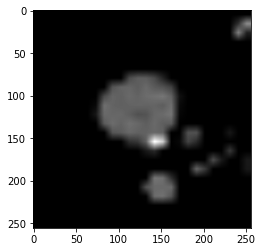

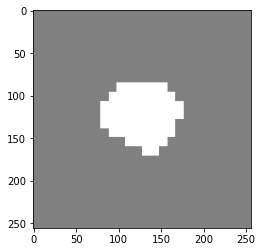

In [30]:
dataset = datasets.get_dataset_class('aorta')(subset='D', directory='train', augment=False, transforms=['itn', 'stn'])
plt.imshow(dataset[10][0][0].numpy(), cmap='gray')
plt.show()
plt.imshow(dataset[10][1][0].numpy(), cmap='gray', alpha=0.5)

In [31]:
img = dataset[10][0][0].squeeze().detach().numpy()
mask_gt = dataset[10][1][0].squeeze().detach().numpy()
img *= 255
img = img.astype(np.uint8)
mask_gt *= 255
mask_gt = mask_gt.astype(np.uint8)
img_rgb = cv.cvtColor(img, cv.COLOR_GRAY2RGB)

In [32]:
print(img_rgb.shape)

(256, 256, 3)


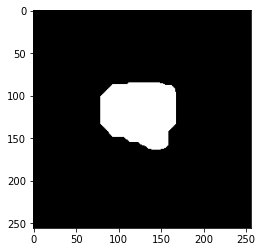

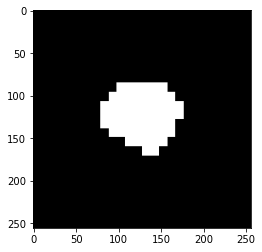

In [33]:
bbox = cv.boundingRect(mask_gt)
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
cv.grabCut(img_rgb,mask,bbox,bgdModel,fgdModel,10,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
# show mask2 compared to mask_gt
plt.imshow(mask2, cmap='gray')
plt.show()
plt.imshow(mask_gt, cmap='gray')
plt.show()